In [12]:
# Exercise to classify handwriten digits using Neural Network
# The implementation below is far from "production level" and it is just for learning purposes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.optimize import minimize


**This content was summarized from Andrew Ng's lectures

## The Neural Network
The input layer of the Neural Networ is given by X:
$$ X := \text{input layer} $$

The neural network is described by the terms below:
$$a_i^{(j)} := \text{activation of unit } i \text{ in layer } j $$
$$\theta^{(j)} := \text{matrix of weights controlling function mapping from layer } j \text{ to layer } j+1 $$
The activation function is demonstrated:
$$ a_1^{(2)} = g(\theta_{10}^{(1)}X_0 + \theta_{11}^{(1)}X_1 + \theta_{12}^{(1)}X_2 + \theta_{13}^{(1)}X_3) $$
and the output layer is
$$ h_\Theta(x) = a_1^{(3)} = g(\theta_{10}^{(2)}a_0^{(2)} + \theta_{11}^{(2)}a_1^{(2)} + \theta_{12}^{(2)}a_2^{(2)} + \theta_{13}^{(2)}a_3^{(2)}) $$

The sigmoid function defined below
$$g(z) = \frac{1}{1+e^{-z}}$$
and its gradient is given as:
$$ \frac{\partial g(z)}{\partial z} = g(z)(1-g(z)) $$

To obtain an evaluation of the hypothesis FORWARD PROPAGATION is performed. The forward propagation is described below:

where $z_1^{(2)}$ is defined as:
$$z_1^{(2)} = \theta_{10}^{(1)}X_0 + \theta_{11}^{(1)}X_1 + \theta_{12}^{(1)}X_2 + \theta_{13}^{(1)}X_3)$$
and 
$$ z^{(2)} = \Theta^{(1)}a^{(1)}$$

$$ h_\Theta(x) = a^{(3)} = g(z^{(3)})$$ 
$$ z^{(3)} = \Theta^{(2)}a^{(2)}$$




## Neural Network from Andrew Ng
![alt text](NeuralNetAndrewNg.png "Neural Net")

## Backpropagation from Andrew Ng Coursera course

Neural Network Cost Function 

$$ J(\Theta) = -\frac{1}{m} \left[\sum_{i=1}^{m}\sum_{k=1}^{K} y_k^{(i)}log (h_\Theta(x^{(i)}))_k  + (1-y_k^{(i)})log(1-(h_\Theta(x^{(i)}))_k ) \right] + \frac{\lambda}{2m} \sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_l+1}(\Theta_{ji}^{(l)})^2 $$

where,
$$ L = \text{number of layers in the network}$$

$$s_l = \text{number of units in layer }l $$

$$ K = \text{number of total outputs,} k  $$

To train the network we aim to minimize the cost function, such as:
$$ \min_{\Theta}J(\Theta)$$

for that we need to compute the gradient,

$$ \frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) $$

The gradient of the cost function $J(\Theta)$ is used to determine the search direction when training the network. The gradient is computed using the Backpropagration Algorithm. The following image describes the algorithm.


![alt text](NN-BackProp_AndrewNg.png "Neural Net")


## Finite Difference Validation

The validation is conducted to check if the implementation of backpropagation is correct. After that the Numerical checking is disabled due to its computational cost.

1. Compute gradient of cost function using finite difference method
$$\frac{d}{d\theta}J(\theta) \approx \frac{ J(\theta + \epsilon) - J(\theta - \epsilon) } {2\epsilon} $$
Take $\epsilon$ as a small value. For example:
$$ \epsilon = 10^{-4} $$

2.Verify if backpropagation result checks with finite difference. Such as:
$$ D \approx \frac{d}{d\theta}J(\theta)  $$

## Training the Neural Network
1. Randomly initialize the weights $\Theta$
2. Using gradient descent \
    for each sample in the training set (1,...,m) \
    2.1 Do Forward propagation followed by backpropagation to find $J(\Theta)$ and its gradient.

In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def GradSigmoid(z):
#     returns the gradient of sigmoid(z)
    return sigmoid(z)*(1-sigmoid(z))

def RandomInitWeights(SizeIn,SizeOut,EpsInit=0.12):
    Weights = np.random.rand(SizeOut,1+SizeIn) * (2*EpsInit) - EpsInit
    return Weights

class TrainingSet:
    def __init__(self, dataset, WeightsData, CheckGradient=False):
        # dataset is string with .mat raw data ('data1ex4')
        # WeightsData: string .mat file w/ already trained Thetas ('weights-ex4')
        self.CheckGradient = CheckGradient
        if not CheckGradient:
            self.rawdata = sio.loadmat(dataset)
            self.weights = sio.loadmat(WeightsData)
            self.X = self.rawdata['X']
            self.y = self.rawdata['y']
            self.Theta1,self.Theta2 = self.weights['Theta1'], self.weights['Theta2']
        
        if CheckGradient:
            InputLayerSz = 3
            HiddenLayerSz = 5
            NumLabels = 3
            m = 5
            self.X = RandomInitWeights(InputLayerSz-1,m)
            self.y = 1 + np.mod(np.arange(1,m+1),NumLabels).reshape((-1,1))


    def Plot(self):
        if not self.CheckGradient:
            plt.figure(figsize=(10, 10))
            fig = plt.figure()
            fig.subplots_adjust(hspace=0.05, wspace=0.025)
            for i in range(1, 101):
                randPlot = np.random.randint(1, 5000)
                ax = fig.add_subplot(10, 10, i)
                plt.imshow(self.X[randPlot,:].reshape(20,20), cmap='gray', extent=[0, 1, 0, 1])
                ax.axis('off')
    
class NeuralNetwork:
    # Trains NN with 1 hidden layers
    def __init__(self, TrainingSet, HiddenLayerSz, lambd,PreTrain=False):
        self.TrainedTh1 = []
        self.TrainedTh2 = []
        self.TrgSet = TrainingSet
        self.InputLayerSz = self.TrgSet.X.shape[1]
        self.HiddenLayerSz = HiddenLayerSz
        self.NumLabels = np.size(np.unique(self.TrgSet.y))
        self.lambd = lambd
        self.Xbias = np.insert(self.TrgSet.X, 0, 1, axis=1)
        self.m,self.n = self.Xbias.shape
        self.YVec = np.zeros((self.m,self.NumLabels)) 
        for i in range(self.YVec.shape[0]): self.YVec[i,self.TrgSet.y[i]-1] = 1
        
        if PreTrain == False:
            print('Not Pre Train')
            self.Theta1 = RandomInitWeights(self.InputLayerSz,self.HiddenLayerSz)
            self.Theta2 = RandomInitWeights(self.HiddenLayerSz,self.NumLabels)
        elif PreTrain == True:
            print('Pre Train')
            self.Theta1 = TrainingSet.Theta1
            self.Theta2 = TrainingSet.Theta2
        
        self.NNParams = np.concatenate((self.Theta1.flatten(),self.Theta2.flatten()))
        
    def UnrollParams(self,NNParams):
        Theta1 = np.reshape(NNParams[0:(self.HiddenLayerSz*(self.InputLayerSz+1))],
                            (self.HiddenLayerSz,(self.InputLayerSz+1)))
        Theta2 = np.reshape(NNParams[((self.HiddenLayerSz*(self.InputLayerSz+1))):],
                           (self.NumLabels,(self.HiddenLayerSz+1)))
        return Theta1,Theta2
    
    def CostFunctionReg(self,*args):
        if self.NumLabels<3:
            print('Error: Num of Labels is smaller than 3')
            
        if not args:
            NNParams = self.NNParams
        if args:
            NNParams = args[0]
            
        Theta1,Theta2 = self.UnrollParams(NNParams)
        
        z2 = self.Xbias @ Theta1.T
        a2 = sigmoid(z2)
        a2 = np.insert(a2, 0, 1, axis=1)
        z3 = a2 @ Theta2.T
        h = sigmoid(z3) # also is a3
        J = -(1/self.m)* np.sum(np.sum(self.YVec*np.log(h) + (1-self.YVec)*np.log(1-h))) + \
        (self.lambd/(2.0*self.m))*(np.sum(np.sum(Theta1[:,1:]**2)) + \
                                   np.sum(np.sum(Theta2[:,1:]**2)))
        return J

    def Backprop(self,NNParams):
        
        Theta1,Theta2 = self.UnrollParams(NNParams)
        D1, D2 = np.zeros(Theta1.shape), np.zeros(Theta2.shape)
        
        for i in range(0,self.m):
            a1 = self.Xbias[i,:].reshape((-1,1))
            # Feed Forward Pass
            z2 = Theta1 @ a1 
            a2 = sigmoid(z2)
            a2 = np.insert(a2, 0, 1, axis=0)
            z3 = Theta2 @ a2 
            h = sigmoid(z3)
            delta3 = h-self.YVec[i,:].reshape((-1,1))
            delta2 = (Theta2[:,1:].T@delta3)*GradSigmoid(z2)
            D1 = D1 + delta2@a1.T
            D2 = D2 + delta3@a2.T
        
        D1 = (1/self.m)*D1
        D2 = (1/self.m)*D2
        D1[:,1:] += (self.lambd/self.m)*Theta1[:,1:]
        D2[:,1:] += (self.lambd/self.m)*Theta2[:,1:]
        return np.concatenate((D1.flatten(),D2.flatten()))

    def Train(self):
        res = minimize(self.CostFunctionReg, self.NNParams, method='CG',
                       jac=self.Backprop,
                       options={'disp': True,'maxiter':50})
        self.TrainedParams = res.x
        
    def PredictAccuracy(self,display=False):
        Theta1,Theta2 = self.UnrollParams(self.TrainedParams)
        Pred = np.zeros(self.m)
        for i in range(0,self.m):
            a1 = self.Xbias[i,:].reshape((-1,1))
            # Feed Forward Pass
            z2 = Theta1 @ a1 
            a2 = sigmoid(z2)
            a2 = np.insert(a2, 0, 1, axis=0)
            z3 = Theta2 @ a2 
            h = sigmoid(z3)
            prob = np.nanmax(h)
            Pred[i] = np.argmax(h)+1
        Accuracy = np.mean(np.equal(self.TrgSet.y.flatten(),Pred))
        if display:
            print('Accuracy is:', Accuracy*100.0,'%')
        return Accuracy,Pred
            
            
    def FiniteDiferenceGrad(self,eps=1e-6):
        print(eps)
        # Use this function only for validation of the Backprop (computationally expensive).
        Gradient = np.empty_like(self.NNParams)
        for j in range(self.NNParams.shape[0]):
            ThetaPlus = np.copy(self.NNParams)
            ThetaMinus = np.copy(self.NNParams)
            ThetaPlus[j] += eps
            ThetaMinus[j] -= eps
            JPlus = self.CostFunctionReg(ThetaPlus)
            JMinus = self.CostFunctionReg(ThetaMinus)
            Gradient[j] = (JPlus - JMinus)/(2.0*eps)
        return Gradient

    def TestGradient(self, debug=False):
        Gradient = self.Backprop(self.NNParams)
        NumGradient = self.FiniteDiferenceGrad()
        if debug:
            print(np.hstack((Gradient.reshape((-1,1)),NumGradient.reshape(-1,1))))
        Diff = np.linalg.norm(NumGradient-Gradient)/np.linalg.norm(NumGradient+Gradient)
        print('Diff: ',Diff, 'Value must be very small')

<Figure size 720x720 with 0 Axes>

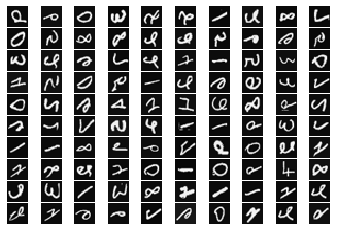

In [24]:
# Load the training set
Trng = TrainingSet('data1ex4','weights-ex4')
Trng.Plot()

In [25]:
# Test Cost Function Values with pre-trained Weights
HiddenLayerSz = 25
lambd = 1
NN = NeuralNetwork(Trng,HiddenLayerSz,lambd,PreTrain=True)
print('Regularized Cost Function:', NN.CostFunctionReg())

Pre Train
Regularized Cost Function: 0.38376985909092365


In [26]:
# Test the backpropagation algorithm against the Numerical Gradient
# A simplified neural network is used by turning on the CheckGradient.
Trng2 = TrainingSet(' ',' ',CheckGradient=True)
# Trng2 = TrainingSet('data1ex4','weights-ex4',CheckGradient=False)
HiddenLayerSz = 5
lambd = 3.0
NN2 = NeuralNetwork(Trng2,HiddenLayerSz,lambd)
NN2.TestGradient()

Not Pre Train
1e-06
Diff:  9.173598325946492e-10 Value must be very small


In [27]:
# Test Accuracy
HiddenLayerSz = 25
lambd = 3
NN = NeuralNetwork(Trng,HiddenLayerSz,lambd,PreTrain=False)
NN.Train()
Accuracy, Pred = NN.PredictAccuracy(display=True)
print(Pred)

Not Pre Train
         Current function value: 0.643727
         Iterations: 50
         Function evaluations: 100
         Gradient evaluations: 100
Accuracy is: 95.74000000000001 %
[10. 10. 10. ...  9.  9.  9.]
